In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
nyc_taxi_weather_hourly_data = pd.read_csv("./share/output/nyc_taxi_analysis_weather_hourly_data/part-00000-06a06de8-f507-4af8-b4fd-e85b0b68c3ba-c000.csv")
nyc_taxi_avg_data = pd.read_csv("./share/output/nyc_taxi_analysis_avg_data/part-00000-d261ad5f-3637-4193-94bf-c834ec17d075-c000.csv")
nyc_taxi_hour_data = pd.read_csv("./share/output/nyc_taxi_analysis_hour_data/part-00000-91517a17-1fd2-48be-b294-3ceb2a0e3895-c000.csv", index_col=0)

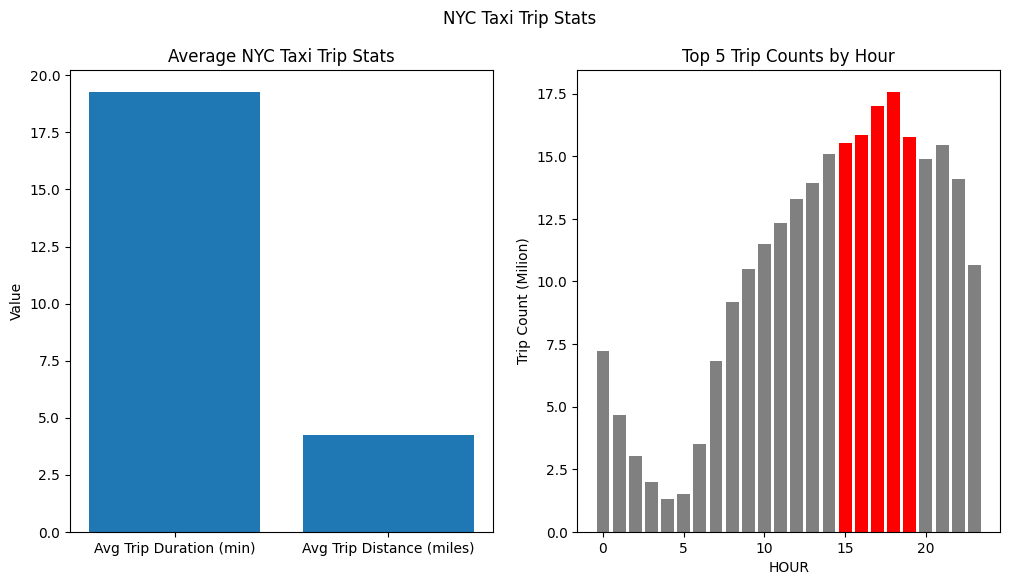

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

labels = ["Avg Trip Duration (min)", "Avg Trip Distance (miles)"]
values = [nyc_taxi_avg_data['avg_trip_duration_min'][0], nyc_taxi_avg_data['avg_trip_distance_miles'][0]]

ax[0].bar(labels, values)
ax[0].set_ylabel("Value")
ax[0].set_title("Average NYC Taxi Trip Stats")

top_5_idx = nyc_taxi_hour_data['count'].nlargest(5).index
colors = [ "red" if i in top_5_idx else "gray" for i in range(len(nyc_taxi_hour_data['count']))]
ax[1].bar(nyc_taxi_hour_data.index, nyc_taxi_hour_data['count'] / 100000, color=colors)
ax[1].set_xlabel("HOUR")
ax[1].set_ylabel("Trip Count (Milion)")
ax[1].set_title("Top 5 Trip Counts by Hour")
plt.suptitle("NYC Taxi Trip Stats")
plt.show()

In [106]:
nyc_taxi_weather_hourly_data = nyc_taxi_weather_hourly_data[nyc_taxi_weather_hourly_data['pickup_date_hour'] < '2024-12-01 00:00:00'].sort_values(by="pickup_date_hour")

In [107]:
nyc_taxi_weather_hourly_data['precipitation_bin'] = pd.cut(
    nyc_taxi_weather_hourly_data['precipitation'],
    bins=[-0.1, 0.1, 1, 3, 5, 10, 20, 50],
    labels=['0', '0.1-1', '1-3', '3-5', '5-10', '10-20', '20+']
)
nyc_taxi_weather_hourly_data['apparent_temperature_bin'] = pd.cut(
    nyc_taxi_weather_hourly_data['apparent_temperature'],
    bins=[-10, -5, 0, 5, 10, 15, 20, 25, 50],
    labels=['-10-5', '-5-0', '0-5', '5-10', '10-15', '15-20', '20-25', '25+']
)
nyc_taxi_weather_hourly_data['wind_speed_bin'] = pd.cut(
    nyc_taxi_weather_hourly_data['wind_speed_10m'],
    bins=[0, 5, 10, 15, 20, 25, 30, 40],
    labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']
)

In [108]:
nyc_taxi_count_per_precipitation = nyc_taxi_weather_hourly_data.groupby(
    'precipitation_bin', observed=True
).agg({'trip_count':'mean'})
nyc_taxi_count_per_temperature = nyc_taxi_weather_hourly_data.groupby(
    'apparent_temperature_bin', observed=True
).agg({'trip_count':'mean'})
nyc_taxi_count_per_wind_speed = nyc_taxi_weather_hourly_data.groupby(
    'wind_speed_bin', observed=True
).agg({'trip_count':'mean'})

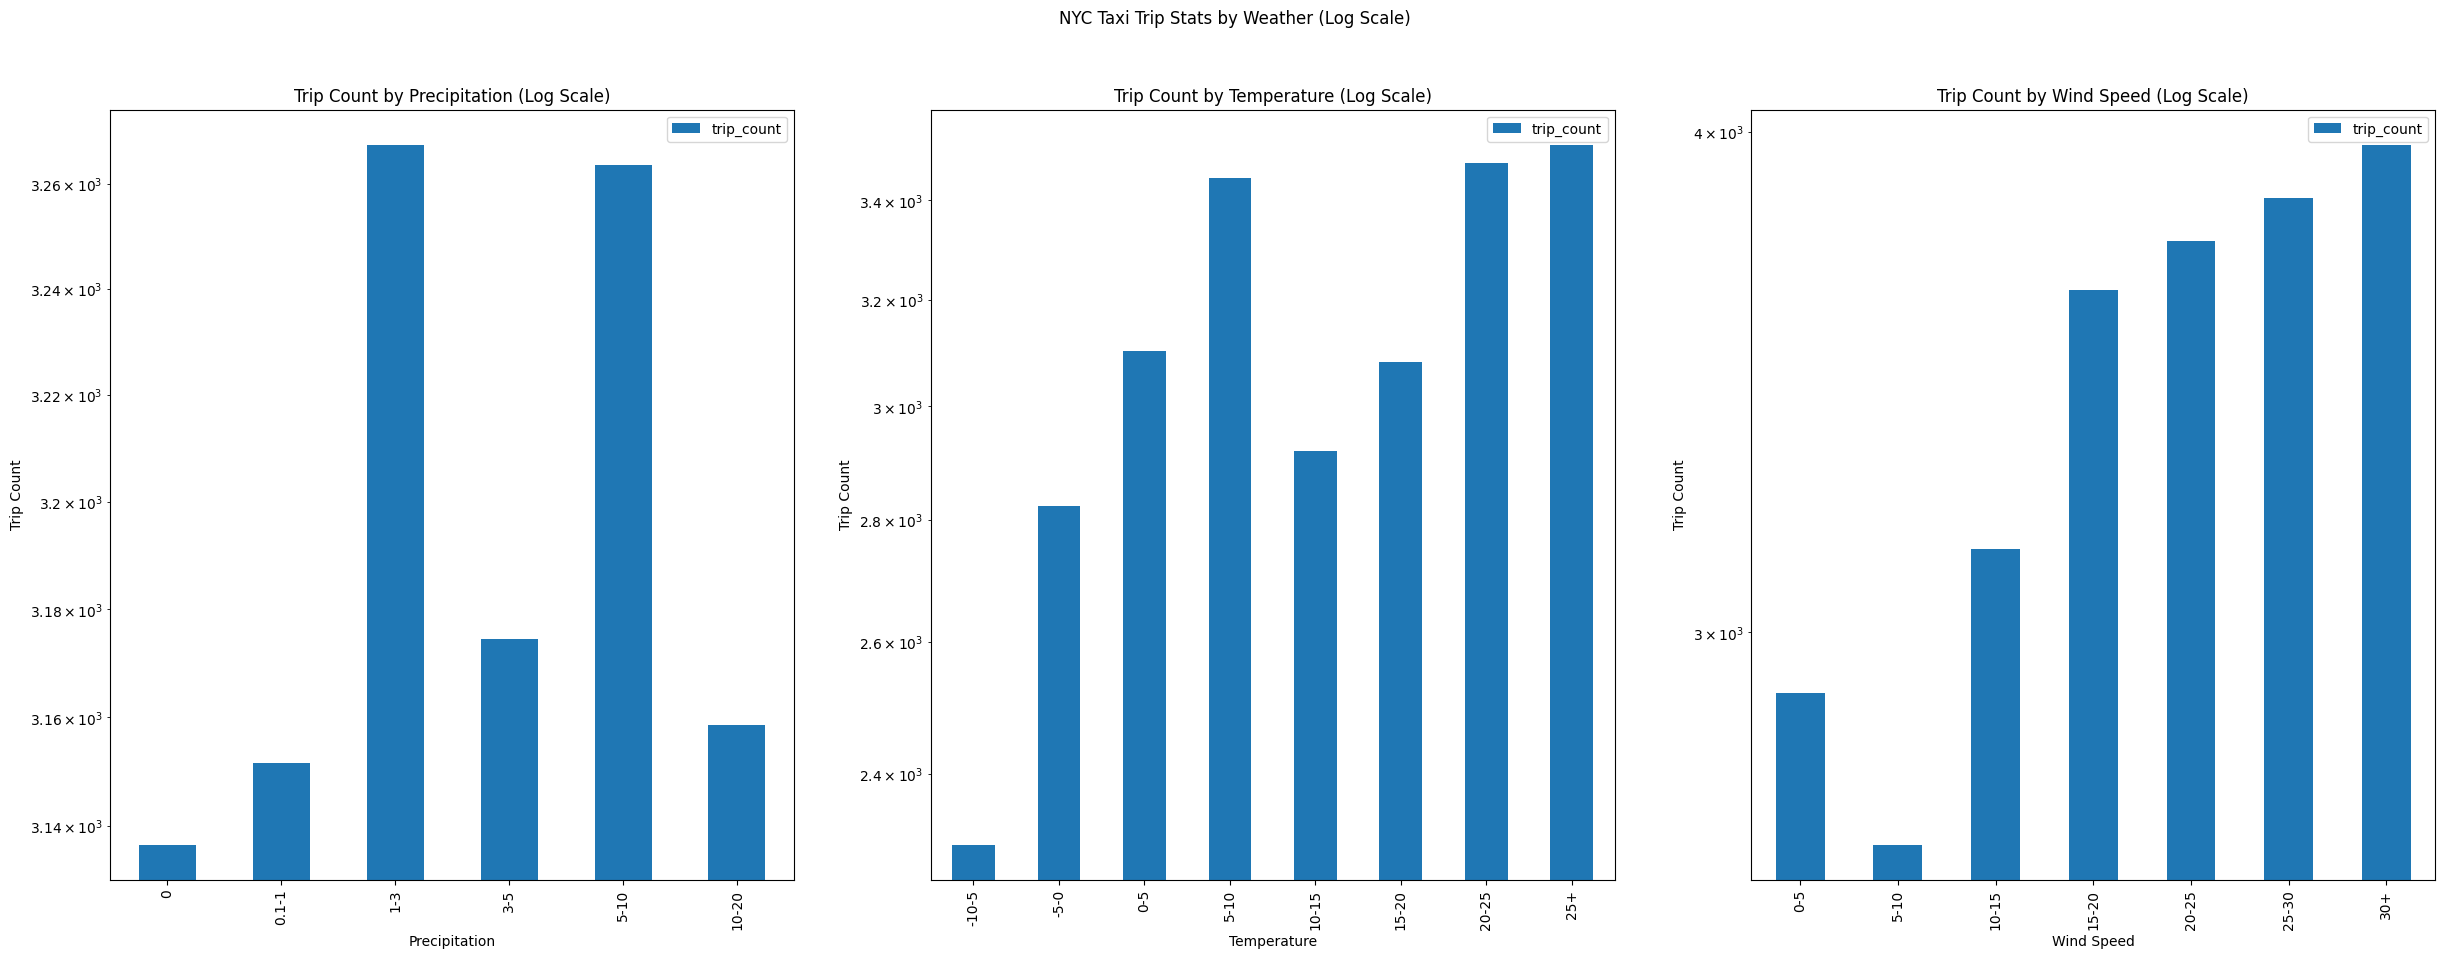

In [109]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

# 강수량에 따른 트립 카운트
nyc_taxi_count_per_precipitation.plot(kind='bar', ax=ax[0])
ax[0].set_title("Trip Count by Precipitation (Log Scale)")
ax[0].set_xlabel("Precipitation")
ax[0].set_ylabel("Trip Count")
ax[0].set_yscale('log')

# 체감 온도에 따른 트립 카운트
nyc_taxi_count_per_temperature.plot(kind='bar', ax=ax[1])
ax[1].set_title("Trip Count by Temperature (Log Scale)")
ax[1].set_xlabel("Temperature")
ax[1].set_ylabel("Trip Count")
ax[1].set_yscale('log')

nyc_taxi_count_per_wind_speed.plot(kind='bar', ax=ax[2])
ax[2].set_title("Trip Count by Wind Speed (Log Scale)")
ax[2].set_xlabel("Wind Speed")
ax[2].set_ylabel("Trip Count")
ax[2].set_yscale('log')

plt.suptitle("NYC Taxi Trip Stats by Weather (Log Scale)")
plt.show()